# 1. Importation des packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Chargement des données

In [2]:
# Chargement du dataset
df = pd.read_csv("insurance.csv")

# 3. Analyse des données

In [3]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# 4. prétraitement des données

In [7]:
# Préparation des données
X = df.drop("charges", axis=1)
y = df["charges"]

In [8]:
# Séparer les colonnes numériques et catégorielles
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

In [9]:
# Prétraitement : encodage + standardisation
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(drop='first'), categorical_cols)
])

In [10]:
list_object = ['sex',
               'smoker',
               'region']

In [11]:
label_encoder = LabelEncoder()
for type in list_object:
    df[type] = label_encoder.fit_transform(df[type])

In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# 5. Division de données (train et test)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Construction et entrainement des modèles

In [14]:
# Définition des modèles
models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}
results = {}

# 7. Evaluation des modèles

In [15]:
for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        "Mean-Absolute-Error": mae,
        "Mean-Squared-Error": rmse,
        "R2-score": r2,
        "y_pred": y_pred
    }

In [16]:
# Résumé des performances
results_df = pd.DataFrame(results).T[["R2-score", "Mean-Squared-Error","Mean-Absolute-Error"]]
print(results_df)

                   R2-score Mean-Squared-Error Mean-Absolute-Error
Linear Regression  0.783593        5796.284659         4181.194474
SVR               -0.071494       12897.600111         8606.592261
Random Forest      0.865606        4567.763512         2543.167848
KNN                 0.70186        6803.367459         3891.052489
Decision Tree      0.737226        6387.122471         3114.152909


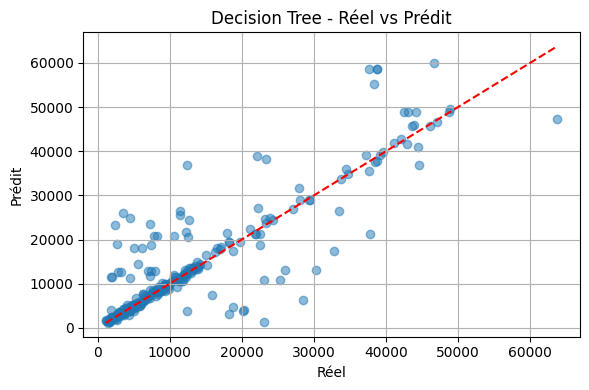

In [17]:
# Graphique Réel vs Prédit
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Réel")
plt.ylabel("Prédit")
plt.title(f"{name} - Réel vs Prédit")
plt.grid(True)
plt.tight_layout()
plt.show()

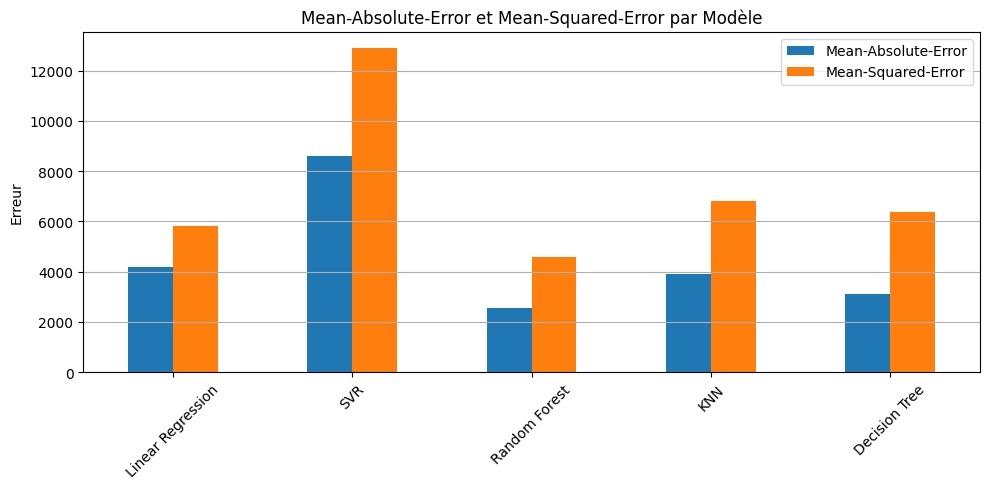

In [18]:
# Barplots
results_df[["Mean-Absolute-Error", "Mean-Squared-Error"]].plot(kind='bar', figsize=(10,5), title="Mean-Absolute-Error et Mean-Squared-Error par Modèle")
plt.ylabel("Erreur")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

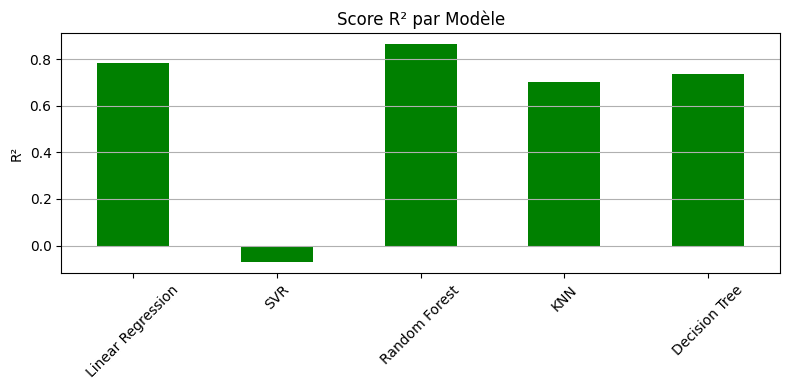

In [19]:
results_df["R2-score"].plot(kind='bar', color='green', title="Score R² par Modèle", figsize=(8,4))
plt.ylabel("R²")
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 8. Prédiction simple

In [20]:
# Exemple d'individu à prédire
new_data = pd.DataFrame([{
    "age": 29,
    "sex": "female",
    "bmi": 26.2,
    "children": 1,
    "smoker": "no",
    "region": "southeast"
}])

In [21]:
# Prédiction sur une seule ligne
predicted_charge = pipeline.predict(new_data)

print(f"Charge médicale prédite : {predicted_charge[0]:.2f}")

Charge médicale prédite : 4237.13
